# Web Server Log Analysis

This notebook analyzes web server logs to understand traffic patterns, user behavior, and server performance.

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data Loading and Preparation

In [3]:
# Read the log file
with open(r'data\tutorialdata\www1\access.log', 'r') as file:
    log_lines = file.readlines()

print(f"Total number of log lines: {len(log_lines)}")
print("\nFirst few lines of the log file:")
for line in log_lines[:5]:
    print(line.strip())

Total number of log lines: 13628

First few lines of the log file:
209.160.24.63 - - [30/Apr/2025:18:22:16] "GET /product.screen?productId=WC-SH-A02&JSESSIONID=SD0SL6FF7ADFF4953 HTTP 1.1" 200 3878 "http://www.google.com" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.46 Safari/536.5" 349
209.160.24.63 - - [30/Apr/2025:18:22:16] "GET /oldlink?itemId=EST-6&JSESSIONID=SD0SL6FF7ADFF4953 HTTP 1.1" 200 1748 "http://www.buttercupgames.com/oldlink?itemId=EST-6" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.46 Safari/536.5" 731
209.160.24.63 - - [30/Apr/2025:18:22:17] "GET /product.screen?productId=BS-AG-G09&JSESSIONID=SD0SL6FF7ADFF4953 HTTP 1.1" 200 2550 "http://www.buttercupgames.com/product.screen?productId=BS-AG-G09" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.46 Safari/536.5" 422
209.160.24.63 - - [30/Apr/2025:18:22:19] "POST /category.screen?categoryId

In [7]:
with open(r'data\tutorialdata\www1\access.log', 'r') as file:
    log_lines = file.readlines()

print(log_lines[0])  # Check what a sample log line looks like


209.160.24.63 - - [30/Apr/2025:18:22:16] "GET /product.screen?productId=WC-SH-A02&JSESSIONID=SD0SL6FF7ADFF4953 HTTP 1.1" 200 3878 "http://www.google.com" "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.46 Safari/536.5" 349



In [12]:
# Define the log pattern
log_pattern = re.compile(
    r'(?P<ip>[\d\.]+)\s+-\s+-\s+\[(?P<timestamp>[^\]]+)\]\s+'
    r'"(?P<method>\w+)\s+(?P<path>.*?)\s+HTTP\s*[\d\.]+"\s+'
    r'(?P<status>\d+)\s+(?P<size>\d+)\s+'
    r'"(?P<referrer>[^"]*)"\s+"(?P<user_agent>[^"]*)"\s+(?P<response_time>\d+)'
)


# Parse the logs
parsed_logs = []
for line in log_lines:
    match = log_pattern.search(line)
    if match:
        log_data = match.groupdict()
        # Parse timestamp
        log_data['timestamp'] = datetime.strptime(log_data['timestamp'], '%d/%b/%Y:%H:%M:%S')
        # Extract product ID if present
        product_id = re.search(r'productId=([^&]+)', log_data['path'])
        log_data['product_id'] = product_id.group(1) if product_id else None
        # Extract category if present
        category = re.search(r'categoryId=([^&]+)', log_data['path'])
        log_data['category'] = category.group(1) if category else None
        log_data['response_time'] = int(log_data['response_time'])
        parsed_logs.append(log_data)

# Create DataFrame
df = pd.DataFrame(parsed_logs)

# Display the first few rows
print("\nParsed DataFrame:")
df.head()


Parsed DataFrame:


,ip,timestamp,method,path,status,size,referrer,user_agent,response_time,product_id,category
0,209.160.24.63,2025-04-30 18:22:16,GET,/product.screen?productId=WC-SH-A02&JSESSIONID...,200,3878,http://www.google.com,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,349,WC-SH-A02,None
1,209.160.24.63,2025-04-30 18:22:16,GET,/oldlink?itemId=EST-6&JSESSIONID=SD0SL6FF7ADFF...,200,1748,http://www.buttercupgames.com/oldlink?itemId=E...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,731,None,None
2,209.160.24.63,2025-04-30 18:22:17,GET,/product.screen?productId=BS-AG-G09&JSESSIONID...,200,2550,http://www.buttercupgames.com/product.screen?p...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,422,BS-AG-G09,None
3,209.160.24.63,2025-04-30 18:22:19,POST,/category.screen?categoryId=STRATEGY&JSESSIONI...,200,407,http://www.buttercupgames.com/cart.do?action=r...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,211,None,STRATEGY
4,209.160.24.63,2025-04-30 18:22:20,GET,/product.screen?productId=FS-SG-G03&JSESSIONID...,200,2047,http://www.buttercupgames.com/category.screen?...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,487,FS-SG-G03,None


In [10]:
print(df.columns)
print(len(df))

Index(['ip', 'timestamp', 'method', 'path', 'status', 'size', 'referrer',
       'user_agent', 'response_time', 'product_id', 'category'],
      dtype='object')
13628


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13628 entries, 0 to 13627
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ip             13628 non-null  object        
 1   timestamp      13628 non-null  datetime64[ns]
 2   method         13628 non-null  object        
 3   path           13628 non-null  object        
 4   status         13628 non-null  object        
 5   size           13628 non-null  object        
 6   referrer       13628 non-null  object        
 7   user_agent     13628 non-null  object        
 8   response_time  13628 non-null  int64         
 9   product_id     6466 non-null   object        
 10  category       2309 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


## Summary Statistics

In [13]:
# Calculate summary statistics
total_requests = len(df)
unique_visitors = df['ip'].nunique()
avg_response_time = df['response_time'].mean()
success_rate = (len(df[df['status'] == '200']) / total_requests * 100) if total_requests > 0 else 0

print("Summary Statistics:")
print(f"Total Requests: {total_requests:,}")
print(f"Unique Visitors: {unique_visitors:,}")
print(f"Average Response Time: {avg_response_time:.0f}ms")
print(f"Success Rate: {success_rate:.1f}%")

Summary Statistics:
Total Requests: 13,628
Unique Visitors: 182
Average Response Time: 550ms
Success Rate: 86.8%


## 1. Requests Over Time

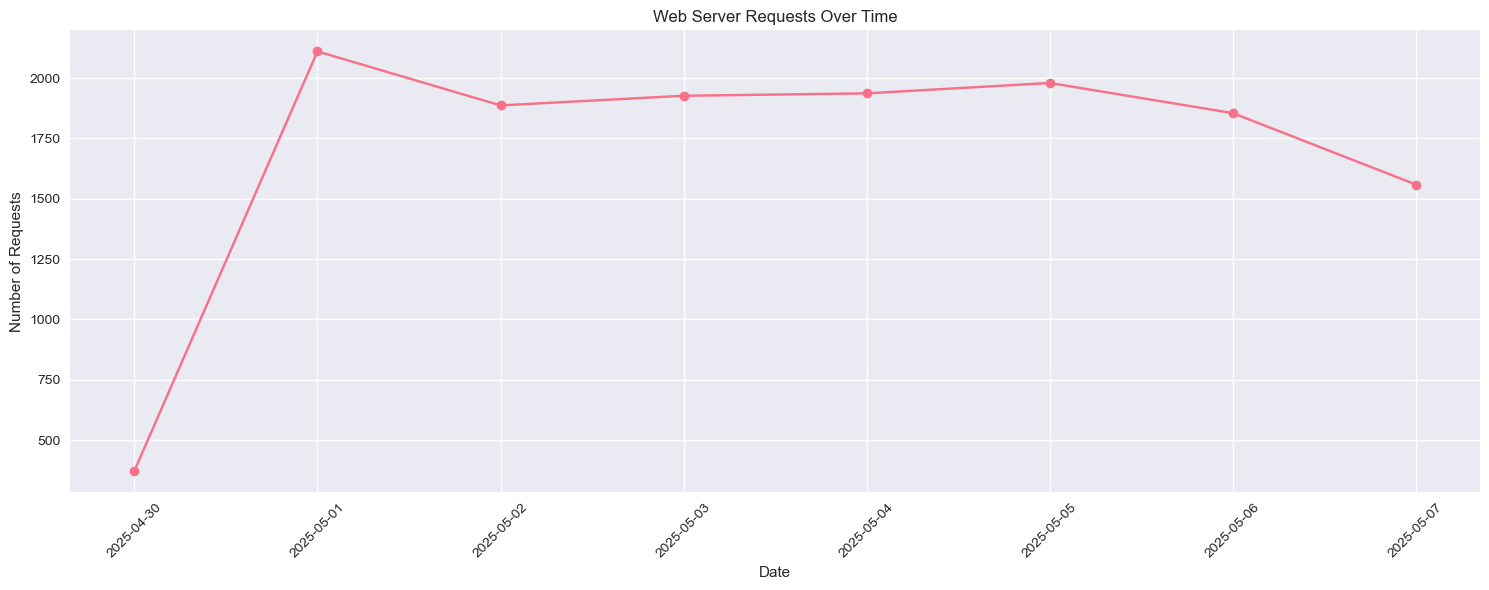

In [15]:
plt.figure(figsize=(15, 6))
df.groupby(df['timestamp'].dt.date).size().plot(kind='line', marker='o')
plt.title('Web Server Requests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. HTTP Status Codes

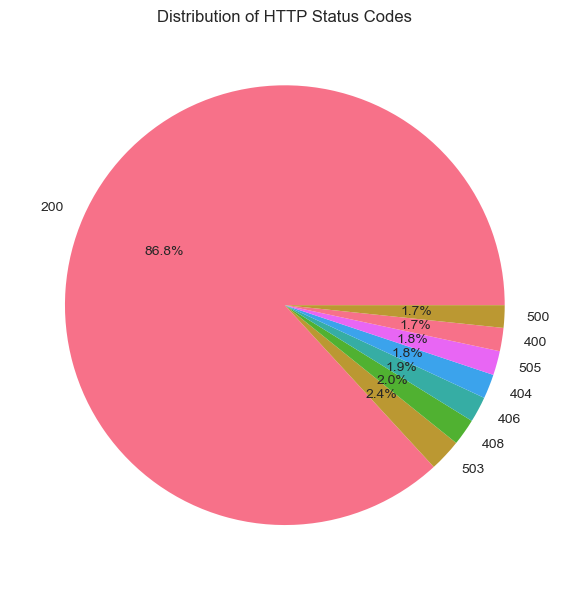

In [16]:
plt.figure(figsize=(10, 6))
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of HTTP Status Codes')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 3. Top Visitors

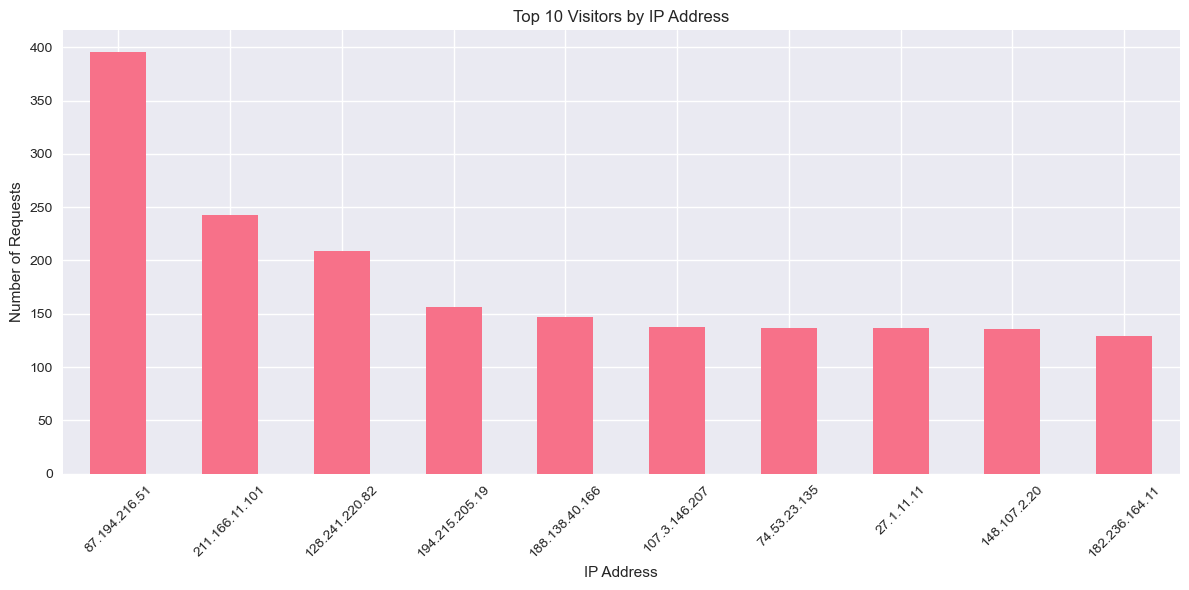

In [17]:
plt.figure(figsize=(12, 6))
df['ip'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Visitors by IP Address')
plt.xlabel('IP Address')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Most Accessed Categories

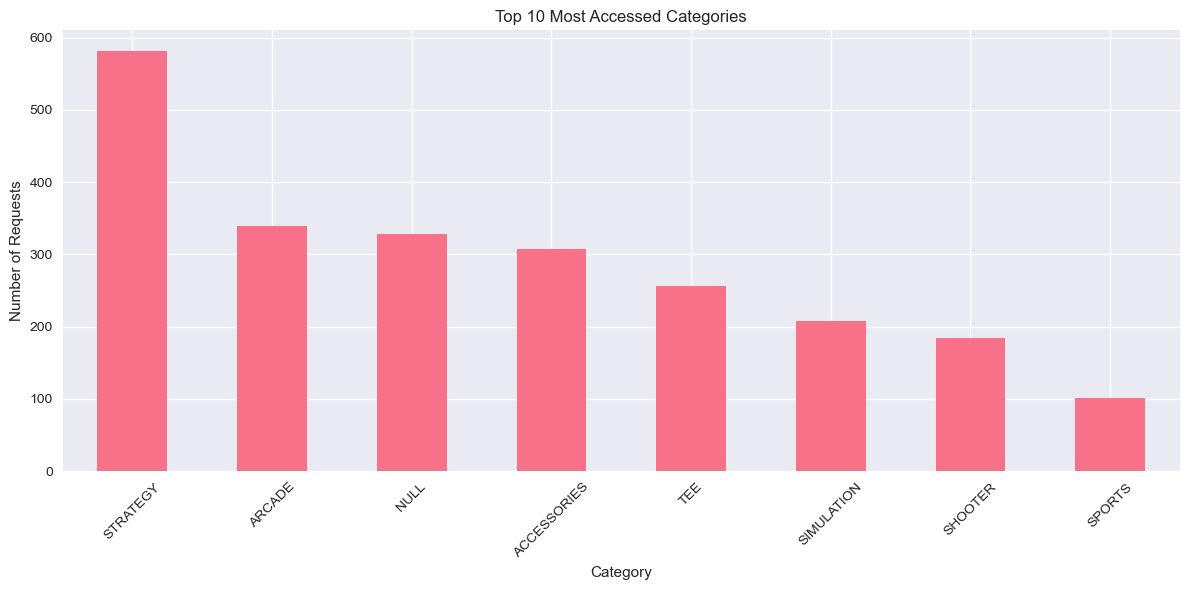

In [18]:
plt.figure(figsize=(12, 6))
df['category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Accessed Categories')
plt.xlabel('Category')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Most Popular Products

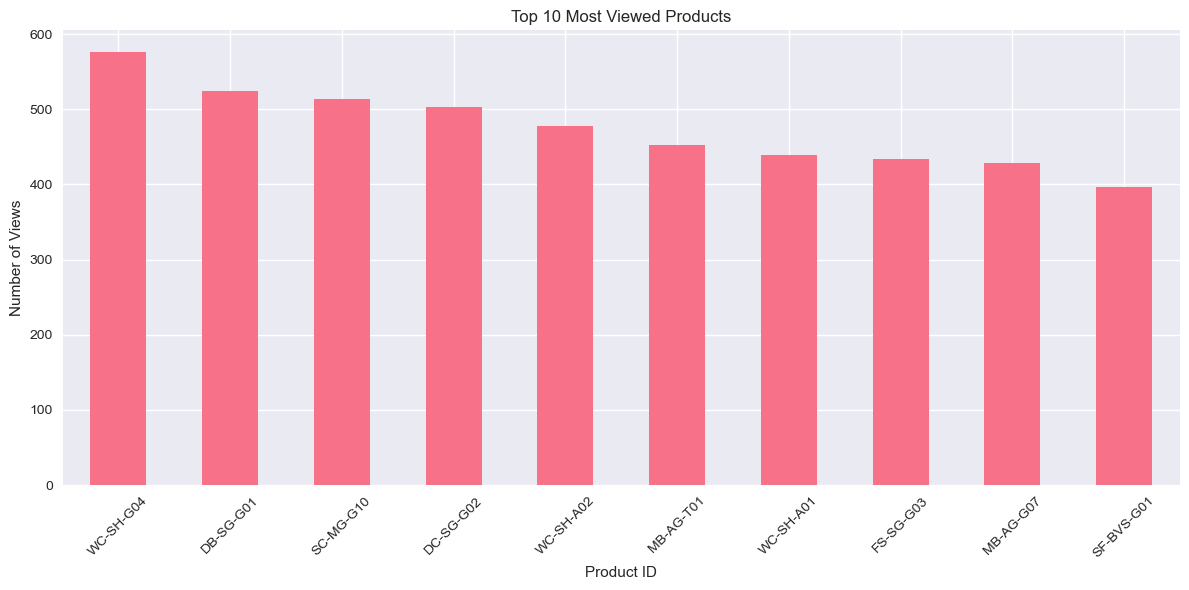

In [19]:
plt.figure(figsize=(12, 6))
df['product_id'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Viewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Requests by Hour

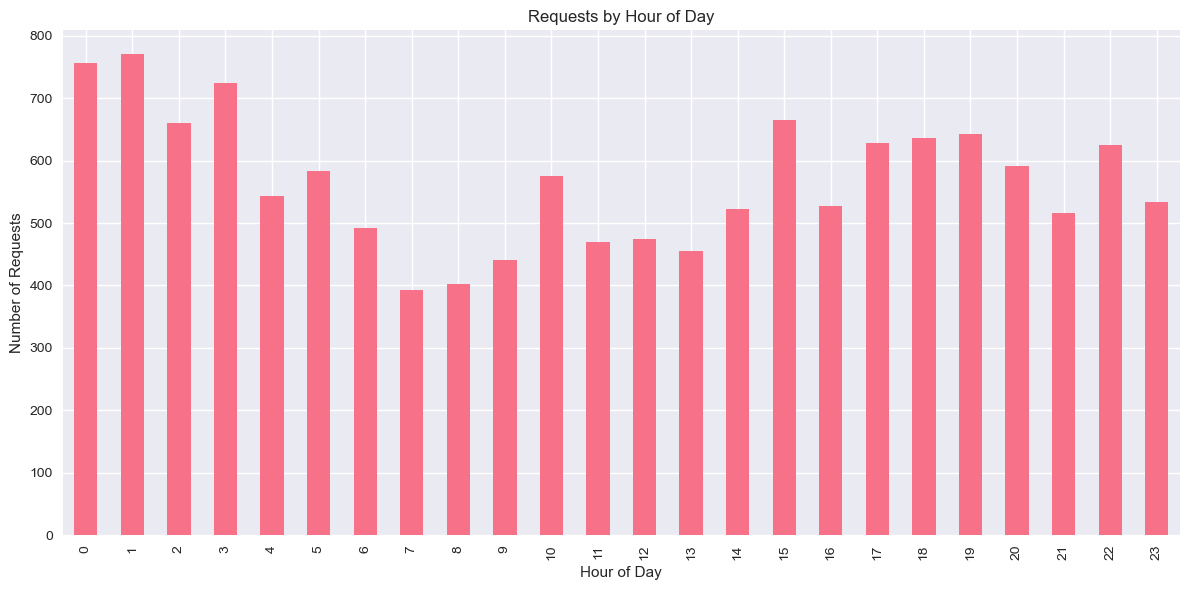

In [20]:
plt.figure(figsize=(12, 6))
df['timestamp'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Requests by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()

## 7. Response Time Distribution

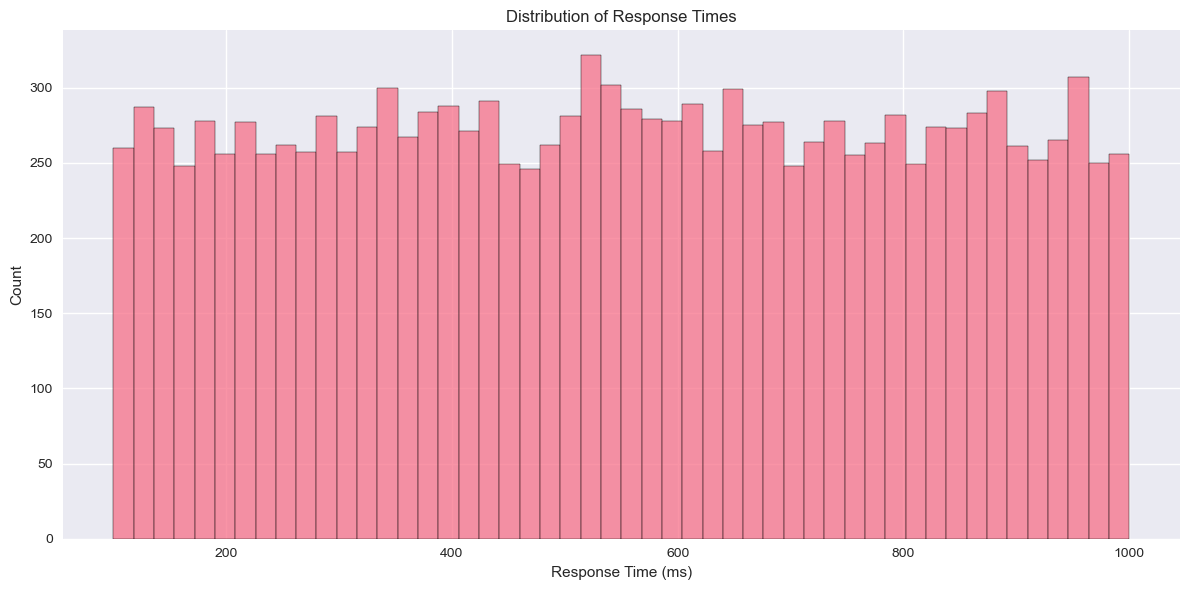

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='response_time', bins=50)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (ms)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 8. Additional Analysis: Browser Distribution

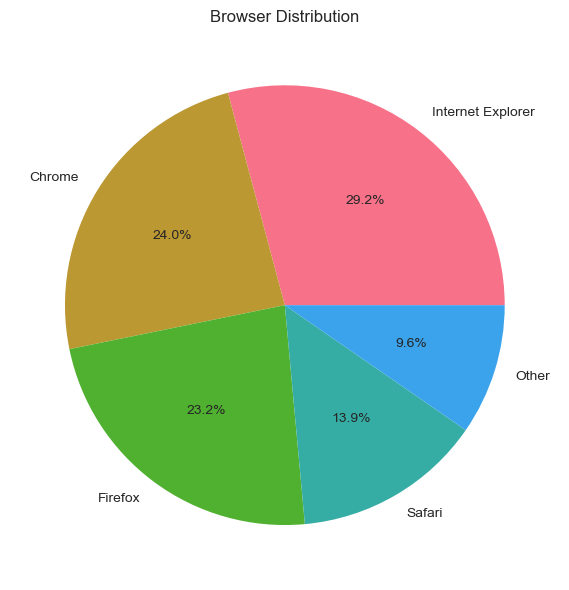

In [22]:
# Extract browser information from user agent
def get_browser(user_agent):
    if 'Firefox' in user_agent:
        return 'Firefox'
    elif 'Chrome' in user_agent:
        return 'Chrome'
    elif 'Safari' in user_agent:
        return 'Safari'
    elif 'MSIE' in user_agent or 'Trident' in user_agent:
        return 'Internet Explorer'
    else:
        return 'Other'

df['browser'] = df['user_agent'].apply(get_browser)

plt.figure(figsize=(10, 6))
df['browser'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Browser Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 9. Request Methods Analysis

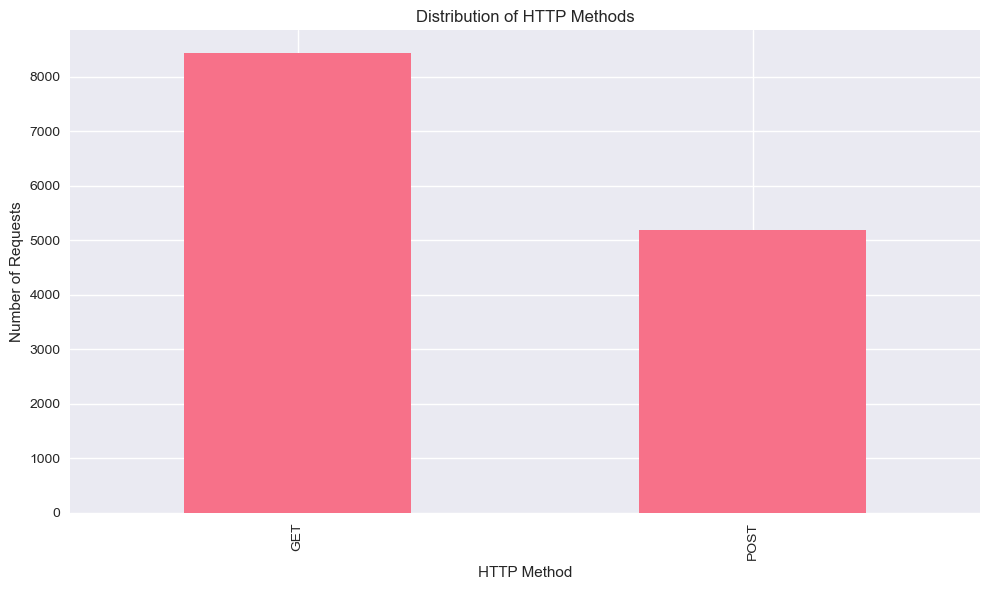

In [23]:
plt.figure(figsize=(10, 6))
df['method'].value_counts().plot(kind='bar')
plt.title('Distribution of HTTP Methods')
plt.xlabel('HTTP Method')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()